# Looking into Pipeline incidents from 2010-Present
* 'Signficiant' and 'non-significant' events
* Events include the following: 
    * Gas distribution
    * Gas Transmission and Gathering
    * Hazardous liquid
    
    **NOTE:** Liquified Natural Gas incidents are not included in this analysis (32 total LNG incidents since 2011)
    
[Data source](https://www.phmsa.dot.gov/data-and-statistics/pipeline/source-data)
Data downloaded on: 

In [1]:
import pandas as pd
import numpy as np
import os

df = pd.read_csv('../data/processed/pipeline_incidents_2010_present_all.csv')
df.head()

/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,15,16,18,19,20,21,22,25,26,27,28,29,30,31,32,33,36,56,57,58,63,64,65,72,73,75,76,77,78,84,85,87,89,92,93,94,95,101,102,103,104,105,106,108,109,116,120,148,149,151,152,154,171,172,173,193,194,197,198,205,209,210,214,217,218,219,221,222,223,225,228,230,231,233,234,238,239,240,250,251,252,256,257,261,262,263,265,266,268,269,276,277,278,279,280,281,286,287,290,293,294,295,296,297,300,301,303,304,305,306,307,310,311,313,314,315,316,317,318,319,320,321,322,324,325,326,327,329,330,331,332,333,334,335,336,337,340,341,342,343,344,345,347,348,351,354,355,356,357,359,360,361,362,363,365,366,3

,datafile_as_of,ff,significant,serious,report_number,supplemental_number,report_received_date,report_type,operator_id,name,...,root_cause_type_other,failure_type,pwf_addl_misalignment_ind,failure_details,ief_addl_misalignment_ind,additional_thermal_ind,spill_type_category,eqf_pump_equipment_ind,io_tank_vessel_ind,prepared_date
0,2/28/22,NO,YES,NO,20100001,15047,3/11/10,SUPPLEMENTAL FINAL,15007,PACIFIC GAS & ELECTRIC CO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/28/22,NO,NO,NO,20100002,15553,3/12/10,SUPPLEMENTAL FINAL,13730,NORTHERN INDIANA PUBLIC SERVICE CO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/28/22,NO,NO,NO,20100003,15023,3/15/10,SUPPLEMENTAL FINAL,31840,UNISOURCE ENERGY SERVICES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/28/22,NO,YES,YES,20100004,15003,3/16/10,ORIGINAL FINAL,13710,NORTHERN ILLINOIS GAS CO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2/28/22,NO,YES,YES,20100005,15639,3/22/10,SUPPLEMENTAL FINAL,6141,NEW MEXICO GAS COMPANY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#Converting to datetimes

df[['incident_identified_datetime', 'installation_year']] = df[['incident_identified_datetime', 'installation_year']].apply(pd.to_datetime, errors='coerce')

### 1. Count of incidents between 2010 and 2021

Conclusions: 
* We can see that there's been an increase in incidents from 2012 to 2014 (although need to quantify percent change) 
* There were more incidents in 2021 than 2010, but not by much
* Since 2015, incidents have largely trended down

<AxesSubplot:title={'center':'Number of Pipeline Incidents 2010-2021'}>

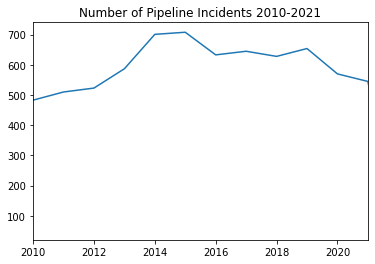

In [3]:
# Looking at number of incidents per year 

df.incident_identified_datetime.dt.year.value_counts().sort_index()\
    .plot(xlim=[2010,2021], title='Number of Pipeline Incidents 2010-2021')

### 2. Looking at the installation years for pipelines that had accidents from 2010 to present

Conclusions: 
* There are two 'general' spikes: 
    * from 1950 to 1970 
    * from 2000 to 2020 (ish)
* I am interested in seeing if the pipelines that were recently installed have led to a greater number of incidents. From this, it seems like there has been. Need to report this out to find out if this is accurate, and why this might be. 
* Pipelines installed in 2015 have resulted in 200 incidents --> this is the most for any installation year for incidents occuring between 2010 and present 

<AxesSubplot:title={'center':'Installation years for pipeline incidents occuring 2010-Present'}>

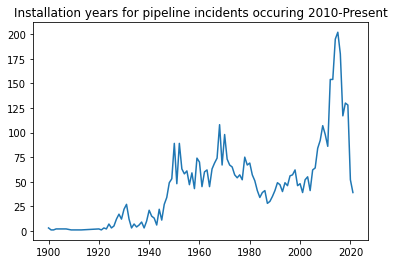

In [4]:
# Installation years with the most incidents occuring between 2010 and present 
df.installation_year.dt.year.value_counts().sort_index()\
.plot(title='Installation years for pipeline incidents occuring 2010-Present')

#OMG


<AxesSubplot:title={'center':'Installation years for pipeline incidents occuring 2010-Present'}>

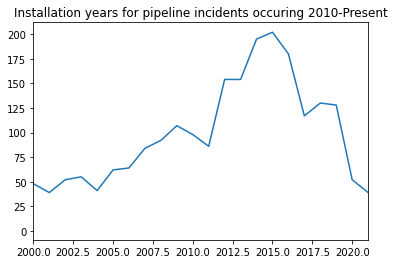

In [5]:
# Looking closer at the spike between 2000 and 2021

df.installation_year.dt.year.value_counts().sort_index()\
.plot(xlim=[2000,2021],title='Installation years for pipeline incidents occuring 2010-Present')

### 3. Looking at the relationship between the cause of the incident and the installation year 

**Steps:**
* Count incidents per cause
* Isolate top 2 causes and look at most common sub causes within each  

**Conclusions:**
* The most common cause was equipment failure (36% of incidents)
    * Top 3 sub causes: 
        1. MALFUNCTION OF CONTROL/RELIEF EQUIPMENT                                           621 (23%)
        2. NON-THREADED CONNECTION FAILURE                                                   609 (22.5%)
        3. PUMP OR PUMP-RELATED EQUIPMENT                                                    475 (17.5%)
* Second most common was corrosion failure (17.1% of incidents) 
    * There are only 2 sub causes for corrosion failure. They are: 
        1. INTERNAL CORROSION    789 (68.4%)
        2. EXTERNAL CORROSION    496 (38.6%) 

In [6]:
# Counting incidents by cause
df['cause'].value_counts()

EQUIPMENT FAILURE                   2703
CORROSION FAILURE                   1285
INCORRECT OPERATION                  877
EXCAVATION DAMAGE                    774
OTHER OUTSIDE FORCE DAMAGE           598
MATERIAL FAILURE OF PIPE OR WELD     567
NATURAL FORCE DAMAGE                 426
OTHER INCIDENT CAUSE                 269
Name: cause, dtype: int64

In [7]:
# Same as above but in percentages
df['cause'].value_counts(normalize=True)

EQUIPMENT FAILURE                   0.360448
CORROSION FAILURE                   0.171356
INCORRECT OPERATION                 0.116949
EXCAVATION DAMAGE                   0.103214
OTHER OUTSIDE FORCE DAMAGE          0.079744
MATERIAL FAILURE OF PIPE OR WELD    0.075610
NATURAL FORCE DAMAGE                0.056808
OTHER INCIDENT CAUSE                0.035871
Name: cause, dtype: float64

In [8]:
# Looking at 'EQUIPMENT FAILURE' sub causes

df[df['cause'] == 'EQUIPMENT FAILURE'].cause_details.value_counts()

MALFUNCTION OF CONTROL/RELIEF EQUIPMENT                                           621
NON-THREADED CONNECTION FAILURE                                                   609
PUMP OR PUMP-RELATED EQUIPMENT                                                    475
OTHER EQUIPMENT FAILURE                                                           376
THREADED CONNECTION/COUPLING FAILURE                                              340
DEFECTIVE OR LOOSE TUBING OR FITTING                                              125
FAILURE OF EQUIPMENT BODY (EXCEPT PUMP), TANK PLATE, OR OTHER MATERIAL            101
COMPRESSOR OR COMPRESSOR-RELATED EQUIPMENT                                         31
FAILURE OF EQUIPMENT BODY (EXCEPT COMPRESSOR), VESSEL PLATE, OR OTHER MATERIAL     12
VALVE                                                                               8
THREADED CONNECTION FAILURE                                                         5
Name: cause_details, dtype: int64

In [9]:
# Same as above but in percent

df[df['cause'] == 'EQUIPMENT FAILURE'].cause_details.value_counts(normalize=True)

MALFUNCTION OF CONTROL/RELIEF EQUIPMENT                                           0.229745
NON-THREADED CONNECTION FAILURE                                                   0.225305
PUMP OR PUMP-RELATED EQUIPMENT                                                    0.175731
OTHER EQUIPMENT FAILURE                                                           0.139105
THREADED CONNECTION/COUPLING FAILURE                                              0.125786
DEFECTIVE OR LOOSE TUBING OR FITTING                                              0.046245
FAILURE OF EQUIPMENT BODY (EXCEPT PUMP), TANK PLATE, OR OTHER MATERIAL            0.037366
COMPRESSOR OR COMPRESSOR-RELATED EQUIPMENT                                        0.011469
FAILURE OF EQUIPMENT BODY (EXCEPT COMPRESSOR), VESSEL PLATE, OR OTHER MATERIAL    0.004440
VALVE                                                                             0.002960
THREADED CONNECTION FAILURE                                                       0.001850

In [10]:
# Looking at 'CORROSION FAILURE' sub causes

df[df['cause'] == 'CORROSION FAILURE'].cause_details.value_counts()

INTERNAL CORROSION    789
EXTERNAL CORROSION    496
Name: cause_details, dtype: int64

In [11]:
# Same as above but in percent

df[df['cause'] == 'CORROSION FAILURE'].cause_details.value_counts(normalize=True)

INTERNAL CORROSION    0.614008
EXTERNAL CORROSION    0.385992
Name: cause_details, dtype: float64

### 4. Looking at 'equipment' and 'corrosion' failures by year 

**Steps:**
* Isolate top 1 cause and look at years of instalation for these incident types
    * Has this cause led to more incidents in a certain year?
* Repeat for top 2 cause

**Conclusions:**
* There is a huge spike in equipment failure pipelines INSTALLED (not occuring. remember: all incidents in this dataset occured in 2010 or later, so by nature this is a universe of "recent" pipeline incidents) 
* This trend doesn't necessarily translate to corrosion failure incidents, the second most common cause for pipeline incidents (scroll down to the second chart to compare the two). While more investigation is needed here, it seems telling that one cause is more likely to occur in recently-installed pipelines than another. WHAT exactly it's telling us remains to be seen!)
    * For these, most corrosion failure incidents occur in pipelines installed in the 1950s to 1970s (which tracks with what we know about corrosion and what [ProPublica](https://www.google.com/url?q=https://www.propublica.org/article/pipelines-explained-how-safe-are-americas-2.5-million-miles-of-pipelines&sa=D&source=docs&ust=1648787007275931&usg=AOvVaw2My52gl_zkluNPyaRwAgfZ) already investiagted

<AxesSubplot:title={'center':'Count of incidents caused by equipment failures by year pipeline installation'}>

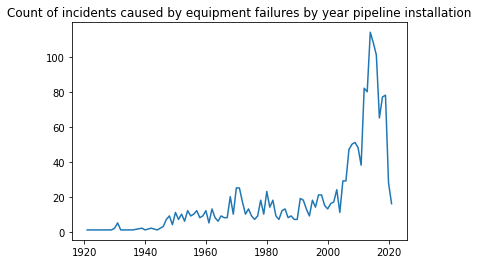

In [42]:
# Looking at 'EQUIPMENT FAILURE' incidents from 2010-present by pipeline year of installation 

df[df['cause'] == 'EQUIPMENT FAILURE'].installation_year\
    .dt.year.value_counts().sort_index()\
    .plot(title='Count of incidents caused by equipment failures by year pipeline installation')

<AxesSubplot:title={'center':'Count of incidents caused by corrosion failures by year pipeline installation'}>

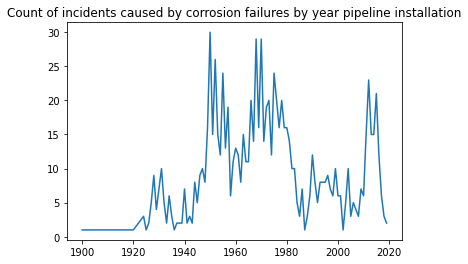

In [43]:
# Looking at 'CORROSION FAILURE' incidents from 2010-present by pipeline year of installation 

df[df['cause'] == 'CORROSION FAILURE'].installation_year\
    .dt.year.value_counts().sort_index()\
    .plot(title='Count of incidents caused by corrosion failures by year pipeline installation')

### 5. Inspecting recent incidents occurring in pipelines constructed after 2000

**Steps:** 
* Create a subset of the df with only incidents occuring in pipelines constructed after the year 2000
* Calculate total cost of these incidents
* Use value_counts() to look for common companies
* Normalize as a percent
* Assess spread of company ownership 
* Save incidents with installation years after 2000 to csv for further analysis 

**Conclusions:** 
* 2231 incidents occured in pipelines installed after 2000
* Incidents occurring after 2000 amounted to $809,883,741 in damages, when adjusted for inflation
* Enterprise Crue Pipeline is responsible for 114 of these incidents (5.3 percent) 
* 10 companies account for nearly 30 percent of pipeline incidents occurring in pipelines built in the last 22 years. 

In [15]:
# Number of incidents
df[df['installation_year'].dt.year > 2000].shape

(2131, 826)

In [16]:
# Total cost
df[df['installation_year'].dt.year > 2000]['total_cost_current'].sum()

809883741.5341468

In [25]:
# Top 10 Companies with most incidents
df[df['installation_year'].dt.year > 2000].name.value_counts().head(10)

ENTERPRISE CRUDE PIPELINE LLC          114
ENTERPRISE PRODUCTS OPERATING LLC       98
PLAINS PIPELINE, L.P.                   91
MAGELLAN PIPELINE COMPANY, LP           64
ONEOK NGL PIPELINE, LLC                 57
SUNOCO PIPELINE L.P.                    55
DCP MIDSTREAM                           44
BUCKEYE PARTNERS, LP                    40
KINDER MORGAN LIQUID TERMINALS, LLC     37
ENERGY TRANSFER COMPANY                 35
Name: name, dtype: int64

In [28]:
# Top 10 Companies with most incidents --> percentages
df[df['installation_year'].dt.year > 2000].name.value_counts(normalize=True).head(10)

ENTERPRISE CRUDE PIPELINE LLC          0.053496
ENTERPRISE PRODUCTS OPERATING LLC      0.045988
PLAINS PIPELINE, L.P.                  0.042703
MAGELLAN PIPELINE COMPANY, LP          0.030033
ONEOK NGL PIPELINE, LLC                0.026748
SUNOCO PIPELINE L.P.                   0.025809
DCP MIDSTREAM                          0.020648
BUCKEYE PARTNERS, LP                   0.018771
KINDER MORGAN LIQUID TERMINALS, LLC    0.017363
ENERGY TRANSFER COMPANY                0.016424
Name: name, dtype: float64

In [29]:
# Top 10 Companies with most incidents --> percentages added up 
df[df['installation_year'].dt.year > 2000].name.value_counts(normalize=True).head(10).to_frame().name.sum()

0.2979821679962459

In [33]:
# Save to csv 
recent_installations = df[df['installation_year'].dt.year > 2000]
#recent_installations.to_csv('recent_installations.csv', index=False)